[View in Colaboratory](https://colab.research.google.com/github/anu0508/Assignment_13.1/blob/master/Assignment_13_1_titanic_DecisionTree.ipynb)

In [0]:
import numpy as np
import io
import requests
import pandas as pd


In [0]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
  

In [0]:
import io

In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [0]:
titanic = pd.read_csv(Url)

In [174]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [176]:
titanic.shape

(891, 12)

In [177]:
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Elias, Mr. Tannous",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [178]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [179]:
titanic.select_dtypes=='object'

False

In [180]:
for col in titanic.columns:
  if titanic[col].dtype=='object':
    
     print(col,'\t',titanic[col].dtype)

Name 	 object
Sex 	 object
Ticket 	 object
Cabin 	 object
Embarked 	 object


In [181]:
titanic['Survived'].dtype

dtype('int64')

In [182]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

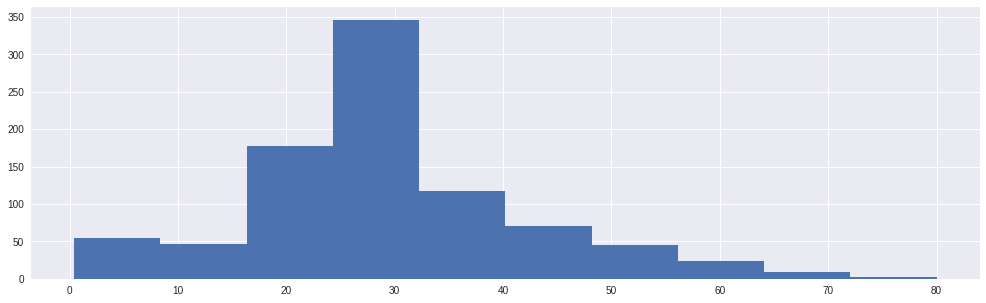

In [183]:
titanic.Age.fillna(value=titanic.Age.median(), inplace=True)
plt.figure(figsize=(17,5))
plt.hist(titanic['Age'])
plt.show()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [185]:
titanic['Age'].max()

80.0

In [186]:
titanic['Age'].min()

0.42

In [187]:
titanic.Age.median(0)

28.0

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


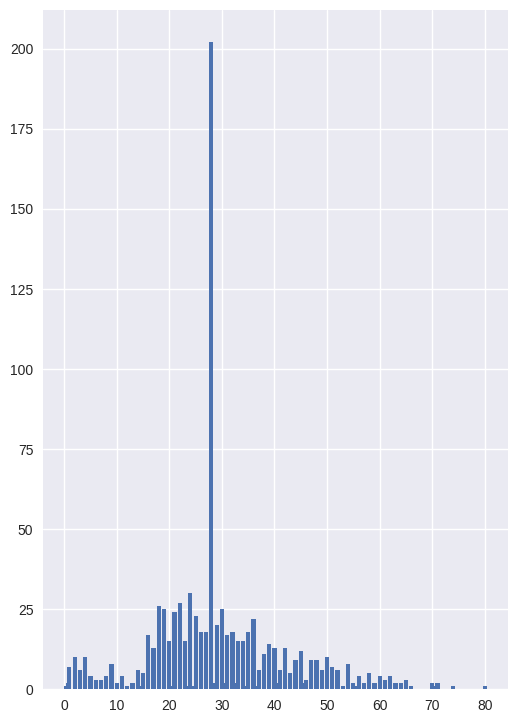

In [188]:
figure = plt.figure(figsize=(6,9), dpi=100);    
graph = figure.add_subplot(111);

freq = pd.value_counts(titanic['Age'])
bins = freq.index
x=graph.bar(bins, freq.values) #gives the graph without NaN


figure.show()

In [189]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
#figure = plt.figure(figsize=(6,9));    
#graph = figure.add_subplot(111);

#temp = titanic['Cabin_mod'].value_counts()
#sizes=temp.values
#labels = temp.index
#x=graph.pie(sizes, labels)
#plt.axis=True


#figure.show() 

In [191]:
#list1=[]
#for items in titanic['Cabin']:
 # print(items)
  #list1.append(items[0:1])
  titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

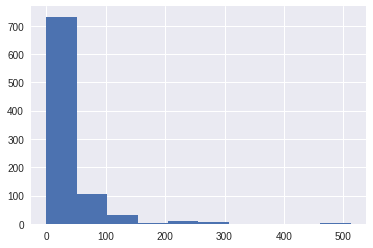

In [192]:
plt.hist(titanic['Fare']) # to check the distibution of fare 
plt.show()

In [0]:
### Categorical variables and values counts
### Pclass

In [194]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [195]:
### Sex
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [196]:
### Embarked
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [197]:
### Cabin
titanic['Cabin'].value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
F2                 3
F33                3
D                  3
C22 C26            3
E101               3
D36                2
B57 B59 B63 B66    2
C68                2
C83                2
C78                2
C93                2
B58 B60            2
C126               2
E44                2
E24                2
C52                2
B77                2
F4                 2
C125               2
D26                2
D35                2
E25                2
C2                 2
F G73              2
D17                2
B20                2
C123               2
                  ..
C54                1
D21                1
C103               1
A6                 1
B71                1
F38                1
B101               1
A32                1
E49                1
F G63              1
A14                1
D15                1
D50                1
E17                1
E38                1
A5                 1
T            

In [0]:
titanic.Cabin.fillna(value='N', inplace=True) #repacing NAN with string N 
list_cabin=[]
for i  in titanic['Cabin']:
  list_cabin.append(i[0])
  

  
      

In [0]:
list_cabin
titanic['Cabin_mod']=list_cabin # added modified cabin column with Nulls removed and category with only first letter of the cabin

In [200]:
titanic.columns #cabin_mod is added to the titanic df

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_mod'],
      dtype='object')

In [201]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_mod
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,N


In [202]:
titanic['Cabin_mod'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_mod, dtype: int64

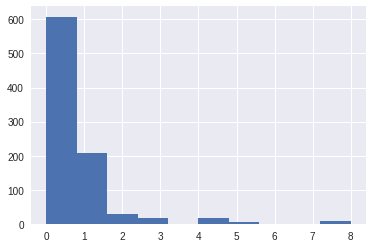

In [203]:
plt.hist(titanic['SibSp'])
plt.show()

In [204]:
#creating bin of Age column
bins = [0, 10, 20, 30, 40, 50, 60,80,100]
labels = [1,2,3,4,5,6,8,10]
titanic['binned'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
print (titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Cabin_mod binned  
0      0         A/5 21171   7.2500     N        S         N      3  
1      0          PC 17599  71.2833   C85        C         C      4  
2      0  STON/O2. 3101282   7.9250     N        S         N      3  
3      0            113803  53.1000  C12

In [205]:
titanic[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


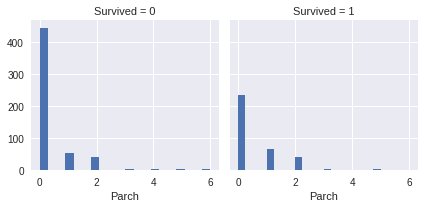

In [206]:
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Parch', bins=20)


In [0]:
### relation ship between survived and class of passenger

In [208]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


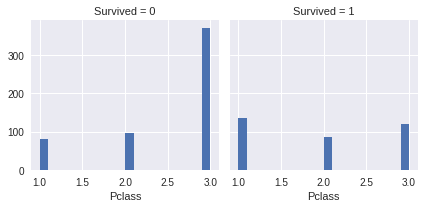

In [209]:
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)


In [210]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


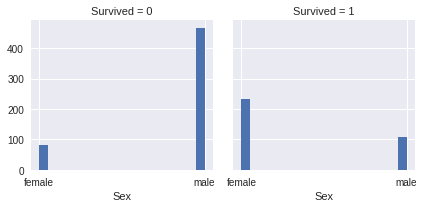

In [211]:
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Sex', bins=20)




```
### relation ship between survived and class of passenger
```



In [0]:
titanic.rename(columns={'binned':'Age_Bin'},inplace= True)

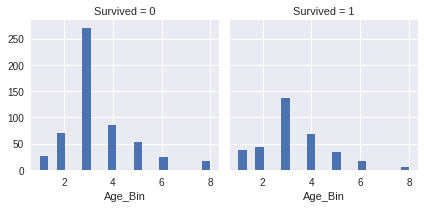

In [213]:
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age_Bin', bins=20)


In [214]:
titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


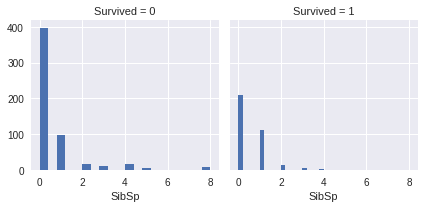

In [215]:
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'SibSp', bins=20)


In [216]:
titanic[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


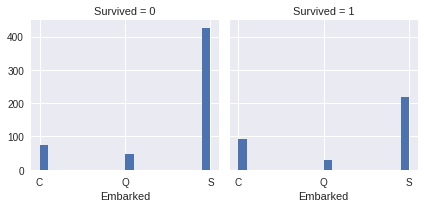

In [217]:
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Embarked', bins=20)


In [218]:
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_mod',
       'Age_Bin'], dtype=object)

In [0]:
### Since majority of the rows are nulls (N) we can simply remove this column from the dataset

### Hence Cabin, Cabin_mod along with Passenger_Id and Name,Age and Embarked are removed

In [0]:
deleted_cols=titanic.drop(columns=['Name','PassengerId','Cabin', 'Cabin_mod','Age','Embarked','Ticket'],axis=1,inplace=True)

In [221]:
titanic.columns.values

array(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age_Bin'],
      dtype=object)

Creating Dummies of the categorical variable

In [0]:
cat_col=['Pclass','Sex','Age_Bin']

In [0]:
for col in cat_col:
  
  dummies=pd.get_dummies(titanic[col],prefix=col)
  X = titanic.join(dummies)

In [224]:
X.columns.values

array(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age_Bin',
       'Age_Bin_1', 'Age_Bin_2', 'Age_Bin_3', 'Age_Bin_4', 'Age_Bin_5',
       'Age_Bin_6', 'Age_Bin_8', 'Age_Bin_10'], dtype=object)

In [0]:
X.drop(columns=['Pclass','Sex','Age_Bin'],axis=1,inplace=True)

In [0]:
#Creating target and features

In [0]:
y=titanic.pop('Survived') #target
#X=titanic                 # features

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
print("size of train_features",X_train.shape)
print("size of train_target",y_train.shape)

print("size of test_features",X_test.shape)

print("size of test_target",y_test.shape)



size of train_features (712, 12)
size of train_target (712,)
size of test_features (179, 12)
size of test_target (179,)


**Logistic regression model for titanic dataset**

In [230]:
classifier=LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred=classifier.predict(X_test)

In [232]:
score = classifier.score(X_test, y_test)  # accuracy score 
print(score)

1.0


**Confusion matrix for Logistic regression model**

In [233]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[105   0]
 [  0  74]]


In [0]:
class_report=classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)

In [235]:
class_report

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00       105\n          1       1.00      1.00      1.00        74\n\navg / total       1.00      1.00      1.00       179\n'

In [0]:
target_names=['class0','class1']

**Below is K fold cross validation using logistic regression model and accuracy is 80.5%**

In [237]:
from sklearn import metrics, cross_validation
predicted = cross_validation.cross_val_predict(classifier, X, y, cv=10)
metrics.accuracy_score(y, predicted)


1.0

**Decision tree classifier**

In [0]:
#decision tree classifier
from sklearn import tree
dtree=tree.DecisionTreeClassifier(min_samples_leaf=2,max_leaf_nodes=4) 

#max_leaf_nodes=4 and min_samples_leaf=2

In [239]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [0]:
#Predicting the test set using decision tree 
prediction=dtree.predict(X_test)

In [241]:
#accuracy score after tuning min_samples_leaf=2
metrics.accuracy_score(y_test, prediction)

1.0

In [242]:
#number of misclassified samples
count_misclassified = (y_test != prediction).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 0


In [243]:
from sklearn import metrics, cross_validation
predicted1 = cross_validation.cross_val_predict(dtree, X, y, cv=10)
metrics.accuracy_score(y, predicted1)

1.0

In [244]:
for name, importance in zip(titanic.columns, dtree.feature_importances_):
    print(name, importance)


Pclass 1.0
Sex 0.0
SibSp 0.0
Parch 0.0
Fare 0.0
Age_Bin 0.0


In [0]:
###  10 fold cross Validation

In [0]:
predicted_dtree = cross_validation.cross_val_predict(dtree, X, y, cv=10)


In [247]:
metrics.accuracy_score(y, predicted_dtree) 

# this accuracy is actual accuracy of the model 

1.0

**Confusion Matrix**

In [248]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[105   0]
 [  0  74]]


** Calssification_report**

In [0]:
class_report_dtree=classification_report(y_test, prediction, labels=None, target_names=target_names, sample_weight=None, digits=2)

In [250]:
class_report_dtree

'             precision    recall  f1-score   support\n\n     class0       1.00      1.00      1.00       105\n     class1       1.00      1.00      1.00        74\n\navg / total       1.00      1.00      1.00       179\n'

In [0]:
 # model works very well and shows 100 % accuracy and 0 misclassification.I have performed logistic regresion and decision tree both model and both give the same accuracy